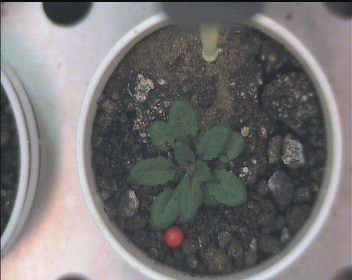

In [4]:
from PIL import Image
image = Image.open('Pot104Cycle0089.jpg')
display(image)

In [5]:
from numpy import asarray
data = asarray(image)
print(data.shape)

(280, 352, 3)


In [46]:
import numpy as np
percent = 8
indices = [(np.random.randint(0, data.shape[0]), np.random.randint(0, data.shape[1])) for i in range(0, int((percent * data.shape[0] * data.shape[1]) / 100))]
samples = [(data[index[0], index[1], 0], data[index[0], index[1], 1], data[index[0], index[1], 2]) for index in indices]
samples[0:10]

[(78, 79, 84),
 (65, 59, 59),
 (211, 199, 221),
 (96, 93, 78),
 (87, 92, 98),
 (54, 58, 59),
 (149, 134, 141),
 (146, 150, 149),
 (83, 79, 80),
 (234, 218, 218)]

In [66]:
from sklearn.cluster import KMeans
nrClusters = 5
kmeans = KMeans(n_clusters=nrClusters, random_state=0).fit(samples)
print(kmeans.cluster_centers_)
kmeans.predict([(100, 100, 100), (10,20, 5)])

[[ 83.28592375  86.21798631  82.33235582]
 [214.1386612  205.64344262 208.50887978]
 [ 57.70201342  59.21342282  60.20178971]
 [173.7474359  171.27179487 173.84871795]
 [137.96615158 130.65047829 130.56512141]]


array([0, 2], dtype=int32)

In [68]:
for y in range(0, data.shape[1]): 
  for x in range(0, data.shape[0]): 
    label = kmeans.predict([(data[x,y,0], data[x,y,1], data[x,y,2])])[0] 
    value = int(label*255/nrClusters)
    image.putpixel((y,x),(value, value, value))

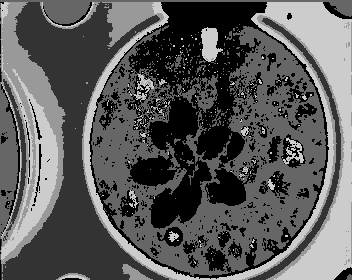

In [69]:
display(image)